**For Problems 15-20, you will play with PLA and pocket algorithm. **

First, we use an artificial data set to study PLA. The data set is in 

    http://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw1/hw1_15_train.dat 

Each line of the data set contains one ($x_n$, $y_n$) with $x_n \in R^4$ . The first 4 numbers of the line contains the 
components of $x_n$ orderly, the last number is $y_n$. Please initialize your algorithm with $w = 0$ and take $sign(0)$ as 1. As a friendly reminder, remember to add $x_0 = 1$ as always! <br /><br /><br />

In [1]:
# import 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## define util functions

#ordinal numbers
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(np.floor(n/10)%10!=1)*(n%10<4)*n%10::4])

# get x & y
def rawData2xy(arr):
    x = np.concatenate((np.ones((len(arr),1)), arr[:,:4]), axis = 1)
    y = arr[:, -1]
    return x, y

<ol start="15">
  <li>Implement a version of PLA by visiting examples in the naive cycle using the order of examples in the data set. Run the algorithm on the data set. What is the number of updates before the algorithm halts? What is the index of the example that results in the most number of updates?</li>
</ol>

In [3]:
# function of PLA
def PLA(x, y, eta):
    w   = np.zeros((1,5))
    upt = np.zeros(len(arr)) # recording the indices where updates occur

    #variables for counting    
    update = 0      # update times
    cyc    = 0      # no. of naive cycles after whole process

    #loop
    # err = np.sum(np.sign(np.dot(w, x.T)) != y)
    while( np.sum(np.sign(np.dot(w, x.T)) != y) != 0):
        for i in range(len(arr)):   
            if np.sign(np.dot(w, x[i])) != y[i]:          
                w = np.add(w, eta*y[i]*x[i])
                update += 1 
                upt[i] += 1
        cyc += 1    

    li = [i for i, j in enumerate(upt) if j == np.max(upt)] 
    return cyc, update, li, w[0]

In [4]:
# load data
arr = np.loadtxt("hw1_15_train.dat")

# Create x & y
x, y = rawData2xy(arr)

# PLA
cyc, update, li, w = PLA(x, y, 1)

print("After" ,cyc,"naive cycle(s), ")
print("w =", w, "after being updated for", update,"times")
print("and the updates most occur at ", ", ".join(ordinal(x) for x in li), "training example.")

After 2 naive cycle(s), 
w = [-3.         3.0841436 -1.583081   2.391305   4.5287635] after being updated for 45 times
and the updates most occur at  58th, 124th training example.


<br /><ol start="16">
  <li>Implement a version of PLA by visiting examples in fixed, pre-determined random cycles throughout the algorithm. Run the algorithm on the data set. Please repeat your experiment for 2000 times, each with a di erent random seed. What is the average number of updates before the algorithm halts? Plot a [histogram]( https://en.wikipedia.org/wiki/Histogram ) to show the number of updates versus frequency. 
    </li>
</ol>


For the PLA algorithm with eta=1:
The average update time is 40.304


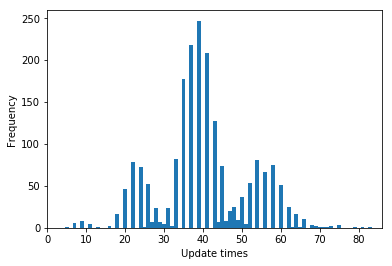

In [5]:
repeat = 2000
eta = 1
updates = np.zeros((repeat))

# shuffle sequence as seed
seed = np.array(range(repeat))
np.random.shuffle(seed)

#loop
for i in range(repeat):
    # shuffle the data
    np.random.seed(seed[i])
    np.random.shuffle(arr)
    
    #create x and y
    x, y = rawData2xy(arr)
    
    #PLA
    _, update, _, _ = PLA(x, y, eta)
    
    updates[i] = update
    
print("For the PLA algorithm with eta=1:")
print("The average update time is", np.average(updates)) 

#plot
hist, bin_edges = np.histogram(updates, bins = range(int(np.max(updates))))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel("Update times")
plt.ylabel("Frequency")
plt.show()    
print()

17.

Implement a version of PLA by visiting examples in fixed, pre-determined random cycles throughout the algorithm, while changing the update rule to be       
    
$ \hspace{15mm} w_{t+1} \leftarrow w_t + \eta y_{n(t)} x_{n(t)} $ 

with $\eta=0.25$. 

Note that your PLA in the previous problem corresponds to $\eta=1$. Please repeat your experiment for 2000 times, each with a different random seed. What is the average number of updates before the algorithm halts? Plot a histogram to show the number of updates versus frequency. Compare your result to the previous problem and brie y discuss your findings. 


 

For the PLA algorithm with eta=0.25:
The average update time is 40.1385


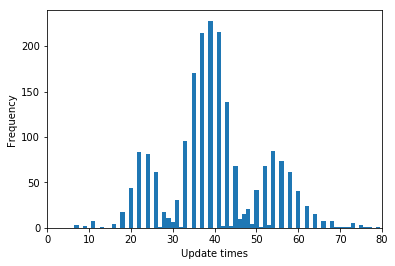

In [6]:
repeat = 2000
eta = .25
updates = np.zeros((repeat))
#np.random.shuffle(seed)

# loop
for i in range(repeat):
    # shuffle the data
    np.random.seed(seed[i])
    np.random.shuffle(arr)
    
    # create x and y
    x, y = rawData2xy(arr)
    
    # PLA
    _, update, _, _ = PLA(x, y, eta)
    
    updates[i] = update
print("For the PLA algorithm with eta=0.25:")
print("The average update time is", np.average(updates)) 

# plot
hist, bin_edges = np.histogram(updates, bins = range(int(np.max(updates))))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel("Update times")
plt.ylabel("Frequency")
plt.show()    
print()

Next, we play with the pocket algorithm. Modify your PLA in Problem 16 to visit examples purely randomly, and then add the 'pocket' steps to the algorithm. 
We will use 

    http://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw1/hw1_18_train.dat
    
as the training data set $D$, and 

    http://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/hw1/hw1_18_test.dat 
    
as the test set for "verifying" the $g$ returned by your algorithm (see lecture 4 about verifying). The sets are of the same format as the previous one. 

<br /><ol start="18">
  <li>Run the pocket algorithm with a total of 50 updates on $D$, and verify the performance of $w_{pocket}$ using the test set. Please repeat your experiment for 2000 times, each with a different random seed. What is the average error rate on the test set? Plot a histogram to show error rate versus frequency.  
    </li>
</ol>
 

 

In [7]:
# function of PLA_pocket
def PLA_pkt(x, y, eta, upt_times):
    w_best = np.zeros((1,5))
    w      = np.zeros((1,5))
    err_best = np.sum(np.sign(np.dot(w_best, x.T)) != y)

    #variables for counting    
    update = 0    # update times

    #loop
    ind = 0
    while(update < upt_times):
        i = ind % len(x)
        if np.sign(np.dot(w, x[i])) != y[i]:
            w = np.add(w, eta*y[i]*x[i])
            update += 1 
            err = np.sum(np.sign(np.dot(w, x.T)) != y)
            if err < err_best:
                w_best = w
                err_best = err
        ind += 1
    return w_best

For the PLA pocket algorithm with 50 update times:
The average error rate in test data is 13.12 %


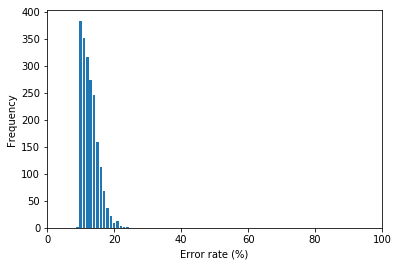

In [8]:
rawTrainData    = np.loadtxt("hw1_18_train.dat")
x_test, y_test  = rawData2xy(np.loadtxt("hw1_18_test.dat"))

repeat = 2000
eta = 1
upt_times = 50
ErrRate = np.zeros((repeat))
#np.random.shuffle(seed)

# loop
for i in range(repeat):
    # shuffle the data
    np.random.seed(seed[i])
    np.random.shuffle(rawTrainData)
    
    # create x and y
    x_train, y_train = rawData2xy(rawTrainData)
    
    # PLA_pocket algo.
    w_best = PLA_pkt(x_train, y_train, eta, upt_times)
    
    # error rate of test dataset
    ErrRate[i] = np.sum(np.sign(np.dot(w_best, x_test.T)) != y_test) / len(x_test) *100 # percentage

print("For the PLA pocket algorithm with 50 update times:")
print("The average error rate in test data is", np.around(np.average(ErrRate), decimals=2),"%")

#plot
hist, bin_edges = np.histogram(ErrRate, bins = range(101))
plt.bar(bin_edges[:-1], hist, width = 0.75, align="center")
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel("Error rate (%)")
plt.ylabel("Frequency")
plt.show()

<br /><ol start="19">
  <li>Modify your algorithm in Problem 18 to run for 100 updates instead of 50, and verify the performance of $w_{pocket}$ using the test set. Please repeat your experiment for 2000 times, each with a different random seed. What is the average error rate on the test set? Plot a histogram to show error rate versus frequency. Compare your result to Problem 18 and briefly discuss your findings. 
    </li>
</ol>

For the PLA pocket algorithm with 100 update times:
The average error rate in test data is 11.38 %


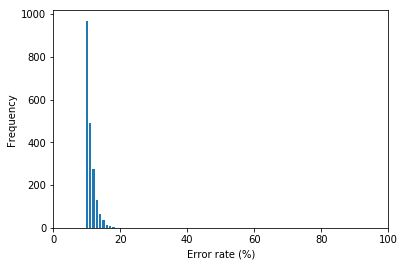

In [9]:
repeat = 2000
eta = 1
upt_times = 100
ErrRate = np.zeros((repeat))
#np.random.shuffle(seed)

# loop
for i in range(repeat):
    # shuffle the data
    np.random.seed(seed[i])
    np.random.shuffle(rawTrainData)
    
    # create x and y
    x_train, y_train = rawData2xy(rawTrainData)
    
    # PLA_pocket algo.
    w_best = PLA_pkt(x_train, y_train, eta, upt_times)
    
    # error rate of test dataset
    ErrRate[i] = np.sum(np.sign(np.dot(w_best, x_test.T)) != y_test) / len(x_test) *100 # percentage

print("For the PLA pocket algorithm with 100 update times:")
print("The average error rate in test data is", np.around(np.average(ErrRate), decimals=2),"%")

#plot
hist, bin_edges = np.histogram(ErrRate, bins = range(101))
plt.bar(bin_edges[:-1], hist, width = 0.75, align="center")
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel("Error rate (%)")
plt.ylabel("Frequency")
plt.show()

<br /><ol start="20">
  <li>Modify your algorithm in Problem 19 to return $w_{100}$ (the PLA vector after 100 updates) instead of $\hat{w}$ (the pocket vector) after 100 updates. Run the modified algorithm on $D$, and verify the performance using the test set. Please repeat your experiment for 2000 times, each with a different random seed. What is the average error rate on the test set? Plot a histogram to show error rate versus frequency. Compare your result to Problem 19 and briefly discuss your findings. 
    </li>
</ol>

In [10]:
# function of PLA with 100 updates
def PLA_100upt(x, y, eta):
    w = np.zeros((1,5))

    #variables for counting    
    update = 0    # update times

    #loop
    ind = 0
    while(update < 100):
        i = ind % len(x)
        if np.sign(np.dot(w, x[i])) != y[i]:
            w = np.add(w, eta*y[i]*x[i])
            update += 1 
        ind += 1
    return w

For the PLA algorithm with 100 update times:
The average error rate in test data is 33.0 %


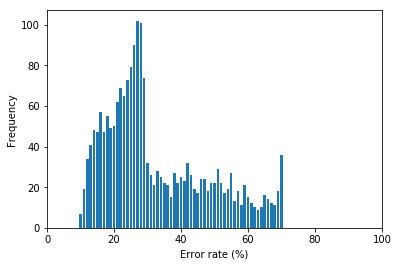

In [11]:
repeat = 2000
eta = 1
upt_times = 100
ErrRate = np.zeros((repeat))
#np.random.shuffle(seed)

# loop
for i in range(repeat):
    # shuffle the data
    np.random.seed(seed[i])
    np.random.shuffle(rawTrainData)
    
    # create x and y
    x_train, y_train = rawData2xy(rawTrainData)
    
    # PLA_pocket algo.
    w100 = PLA_100upt(x_train, y_train, eta)
    
    # error rate of test dataset
    ErrRate[i] = np.sum(np.sign(np.dot(w100, x_test.T)) != y_test) / len(x_test) *100 # percentage

print("For the PLA algorithm with 100 update times:")
print("The average error rate in test data is", np.around(np.average(ErrRate), decimals=2),"%")

#plot
hist, bin_edges = np.histogram(ErrRate, bins = range(101))
plt.bar(bin_edges[:-1], hist, width = 0.75, align="center")
plt.xlim(min(bin_edges), max(bin_edges))
plt.xlabel("Error rate (%)")
plt.ylabel("Frequency")
plt.show()